<a href="https://colab.research.google.com/github/yngvib/DeepLearningCourse/blob/master/Deep_Learning_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning LAB 2**

The objectives of this lab is to further familiarize students with the basics of Keras and Deep Learning.   In particular, we will learn how to manipulate images, create learning models and parameterize them, see the effects of different activation functions and regularization terms, as well as how to visulize learning progress.

This lab is slightly adapted from an online tutorial by Adrian Rosebrock.

Read the code in each of the steps carefully with the aim of fully understand what is going on (the instructor will help as needed),. Then run each step.

Once, you have finished going through all the steps, try to improve the test accuracy of the ANN, for example, by:

*   using different activation function in the hidden layers
*   increase number of layers
*   add regularizers (see Keras documentation)

Were you able to improve the test accuracy of the network? By how much? Which enhancements worked the best? Show your result to the lab instructor.






# Step 1:  "Upload" the images in Colaboratory


# Step 2: Import necessary Python packages

Apart from the necessary Keras packages, we will be using several other support libraries to make our life easier, for example, OpenCV for reading in (and manipulating) images, SciKit for transformations, etc.


In [41]:
import os  # misc operating system specific operations, e.g., reading directries. 
import random

import cv2
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, SpatialDropout1D
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.layers import Conv2D, Flatten, MaxPool2D, Activation, Dropout

import matplotlib.pyplot as plt

#from keras import regularizers

random_seed = 42   # include for reproducability

# Step 3: Read in the filesystem paths of the images

In [10]:
print("[INFO] loading images...")

# Specify locations of input and output files.
tutorial_dir = "./lab2/"
args = {}
args["dataset"] = tutorial_dir + "animals/"
args["model"]   = tutorial_dir + "output/simple_nn.model"
args["plot"]    = tutorial_dir + "output/simple_nn_plot.png"

# Read in the file paths of the images to use for the training.
image_paths = list()

for (dirpath, dirnames, filenames) in os.walk(args["dataset"]):
    for file in filenames:
        if '.jpg' in file and not file.startswith('.'):
              image_paths.append(os.path.join(dirpath, file))
                
random.seed(random_seed)
random.shuffle(image_paths)

[INFO] loading images...


# Step 4: Read in and preprocess the images

<class 'numpy.ndarray'>


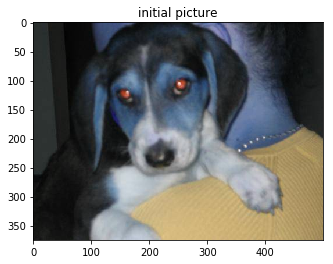

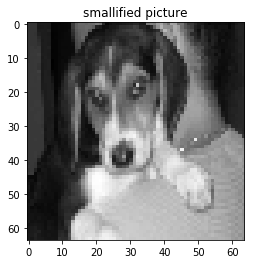

In [30]:
image = cv2.imread(image_paths[40])
print(type(image))
plt.imshow(image)
plt.title('initial picture')
plt.show()
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image2 = cv2.resize(image2, dsize=(64, 64), interpolation=cv2.INTER_LANCZOS4)
plt.imshow(image2,cmap='gray')
plt.title('smallified picture')
plt.show()


In [31]:
input_data   = []
input_labels = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (64, 64)) # smallify the image
    input_data.append(image)
    label = image_path.split(os.path.sep)[-2]
    input_labels.append(label)

# Normalize the pixel values to be in the range [0,1], and store as NumPy arrays.
input_data   = np.array(input_data)# maybe this should be changed
input_labels = np.array(input_labels)
print(input_data)
print(input_labels)

[[[ 51  38  79 ...  84  37  72]
  [ 36  48  74 ...  66  49  54]
  [ 18  44  64 ...  50  88  44]
  ...
  [ 86 100 115 ...  95  66  52]
  [ 75  86  62 ...  77  74  68]
  [ 58  44  90 ...  75  73  66]]

 [[119 119 119 ... 103 101 102]
  [128 125 125 ... 110 110 107]
  [122 124 121 ... 110 106 105]
  ...
  [109 111 110 ... 247 245 245]
  [115 112 110 ... 140 152 170]
  [112 116 112 ... 132 128 137]]

 [[ 40  44  45 ...  25 107  97]
  [ 38  50  65 ...  41 119 112]
  [ 63  75  58 ... 106 108 122]
  ...
  [134 142 144 ...  75 109  68]
  [137 151 112 ... 114  46  88]
  [126 114 144 ... 146 108 161]]

 ...

 [[ 89  82  84 ...  39  41  38]
  [ 93  86  90 ...  37  37  40]
  [104  96 100 ...  38  37  38]
  ...
  [181 158 175 ... 153 150 155]
  [175 177 174 ... 151 139 151]
  [179 178 183 ... 149 149 145]]

 [[ 59  59  61 ... 207 201 190]
  [ 58  65  84 ... 212 187 180]
  [ 91 107 110 ... 194 201 186]
  ...
  [ 98  94 110 ... 115 136 148]
  [ 92  95 113 ... 122 128 129]
  [ 92  95  96 ... 127  98 1

# Step 5: Split the data into test and training set, and reformat target values

In [32]:
# Split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(input_data, 
                                                  input_labels, 
                                                  test_size=0.25, 
                                                  random_state=random_seed)
# Convert the target categorial labels into binary vectors 
# (for 2-class, binary classification you should use Keras' 
#  to_categorical function instead as the scikit-learn's LabelBinarizer)
lb = LabelBinarizer()    # ... from scikit
trainY = lb.fit_transform(trainY)  # ... from scikit
testY  = lb.transform(testY)       # ... from scikit

# Step 5: Create the ANN model, train it, and then evaluate it

In [47]:
# Define a 49152-4096-1024-3 architecture using Keras
print(trainX.shape)
model = Sequential()
#layer 1
model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,1)))
model.add(Activation('relu'))
#layer 2
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
#layer 3
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#layer 4
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation('relu'))
#model 5
model.add(Dense(len(lb.classes_)))
model.add(Activation('softmax'))

# Set initial learning rate and number of epochs to train for
INIT_LR = 0.01
EPOCHS = 10

# Compile the model using Stocastic-GD as our optimizer and categorical
# cross-entropy loss function
# (in case of 2-class classification, you would instead use binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Now train the ANN ...
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

# ... and then evaluate it.
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	       predictions.argmax(axis=1), target_names=lb.classes_))

# Store the model on disk.
print("[INFO] serializing and storing the model ...")
model.save(args["model"])


(2250, 64, 64)
[INFO] training network...


ValueError: Error when checking input: expected conv2d_12_input to have 4 dimensions, but got array with shape (2250, 64, 64)

# Output a graph with information about learning progress.


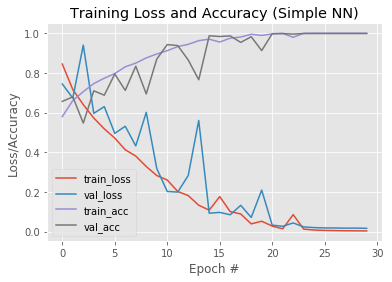

In [6]:
# Plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["plot"])

In [7]:
print(os.path.sep)

\


In [8]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	       predictions.argmax(axis=1), target_names=lb.classes_))


[INFO] evaluating network...
                      precision    recall  f1-score   support

 ./lab2/animals/cats       1.00      1.00      1.00      1226
 ./lab2/animals/dogs       1.00      1.00      1.00      1250
./lab2/animals/panda       1.00      1.00      1.00      1274

           micro avg       1.00      1.00      1.00      3750
           macro avg       1.00      1.00      1.00      3750
        weighted avg       1.00      1.00      1.00      3750

